**Import Lib**

In [1]:
import random
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, normalized_mutual_info_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture

**Datasets**

/tmp/ipykernel_42/2629201986.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2[:, 0], X2[:, 1], cmap='viridis')


Text(0.5, 1.0, 'Dataset 4: Noisy Circles')

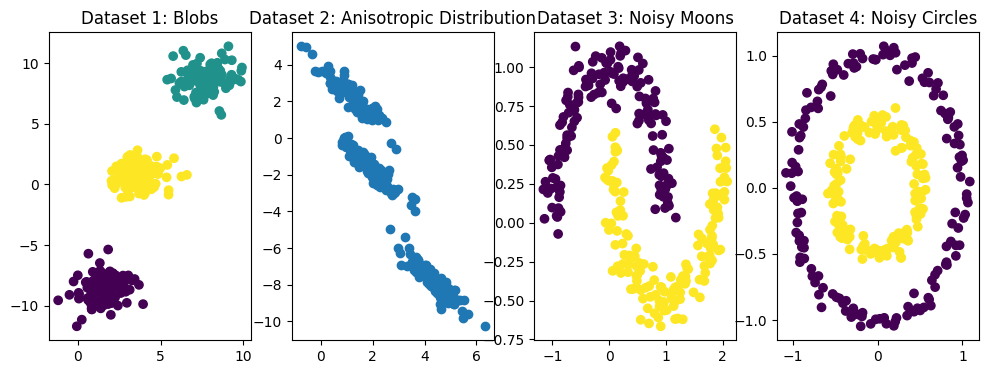

In [2]:
# Number of samples for each dataset
n_samples = 300

# Setting a specific random state for reproducibility
random_state = 75

# Dataset 1: Blobs dataset
X1, y1 = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# Dataset 2: Anisotropically distributed dataset
X2, y2 = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X2 = np.dot(X2, transformation)

# Dataset 3: Noisy moons dataset
X3, y3 = datasets.make_moons(n_samples=n_samples, noise=0.1, random_state=random_state)

# Dataset 4: Noisy circles dataset
X4, y4 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)

# Plotting the datasets
plt.figure(figsize=(12, 4))

# Subplot for Dataset 1: Blobs
plt.subplot(141)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis')
plt.title('Dataset 1: Blobs')

# Subplot for Dataset 2: Anisotropic Distribution
plt.subplot(142)
plt.scatter(X2[:, 0], X2[:, 1], cmap='viridis')
plt.title('Dataset 2: Anisotropic Distribution')

# Subplot for Dataset 3: Noisy Moons
plt.subplot(143)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='viridis')
plt.title('Dataset 3: Noisy Moons')

# Subplot for Dataset 4: Noisy Circles
plt.subplot(144)
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap='viridis')
plt.title('Dataset 4: Noisy Circles')

***Kmeans Algorithem***

K-means algorithm is an unsupervised machine learning algorithm used for clustering analysis. It aims to partition a given dataset into a predetermined number of clusters, where each data point belongs to the cluster with the nearest mean (centroid). The algorithm iteratively assigns data points to the nearest centroid and recalculates the centroids based on the assigned points until convergence or a predefined number of iterations.

In [3]:
def Kmean(X, k):
    #Initialize random centroids
    random_centroid = random.sample(range(0, X.shape[0]), k)
    centroid = X[random_centroid]

    # Perform K-means iterations (50 iterations in this case)
    for _ in range(50):
        # Assign data points to clusters
        cluster_groups = assign_point_clusters(X, centroid)

        # Store old centroid positions
        old_centroid = centroid

        # Update centroids based on cluster groups
        centroid = move_centroid_based_on_cluster_group(X, cluster_groups)

        # Update centroids based on cluster groups
        check_convergence = np.all(old_centroid == centroid)

        # Check convergence by comparing old and new centroids
        if check_convergence: # If true, break the loop

            # Calculate Sum of Squared Errors (SSE)
            sse = calculate_sse(X, centroid,cluster_groups)
            break


    return cluster_groups, sse

# Calculate Sum of Squared Errors (SSE)
def calculate_sse(X, centroid, cluster_groups):
    sse = 0
    for i in range(len(X)):
        cluster_type = cluster_groups[i]
        centroid_i = centroid[cluster_type]
        squared_distance = np.sum((X[i] - centroid_i) ** 2)
        sse += squared_distance
    return sse

# Assign data points to clusters
def assign_point_clusters(X, centroid):
    cluster_group = []
    for point in X:
        distances = []
        for i in centroid:
            distances.append(np.linalg.norm(point - i))
        min_distance = min(distances)
        index_pos = distances.index(min_distance)
        cluster_group.append(index_pos)
    return np.array(cluster_group)

# Update centroids based on cluster groups
def move_centroid_based_on_cluster_group(X, cluster_group):
    new_centroid = []
    cluster_types = np.unique(cluster_group)
    for cluster_type in cluster_types:
        new_centroid.append(X[cluster_group == cluster_type].mean(axis=0))
    return np.array(new_centroid)

In [4]:
def best_number_k(data,cluster_range,title):
  # Initialize lists to store mean values and SSEs for different k values
    y_mean_list = []
    sse_list = []

    # Iterate over each k value in the cluster range
    for k in cluster_range:

      # Perform K-means clustering for the current k value
        y_mean,sse = Kmean(data, k)

        # Append mean value and SSE to respective lists
        y_mean_list.append(y_mean)
        sse_list.append(sse)

    # Plot SSE values against different k values
    fig = plt.figure(figsize=(6,6))
    plt.plot(cluster_range,sse_list,'bx-')
    plt.xlabel('(k)')
    plt.ylabel('(SSE)')
    plt.title(title)
    plt.show()

    # Return lists of mean values and SSEs for analysis
    return y_mean_list ,sse_list

**Dataset 1**

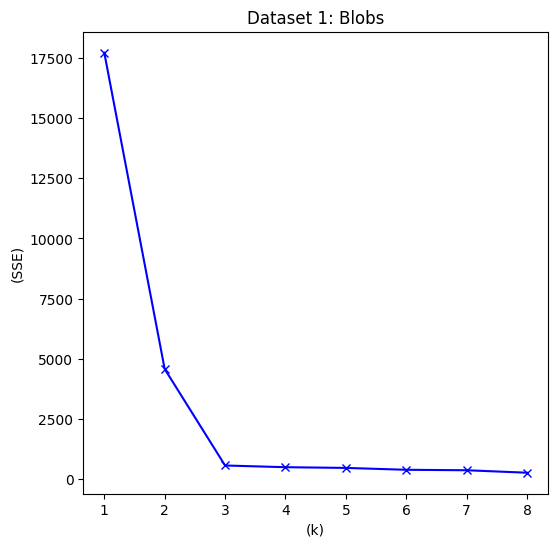

number of k= 3


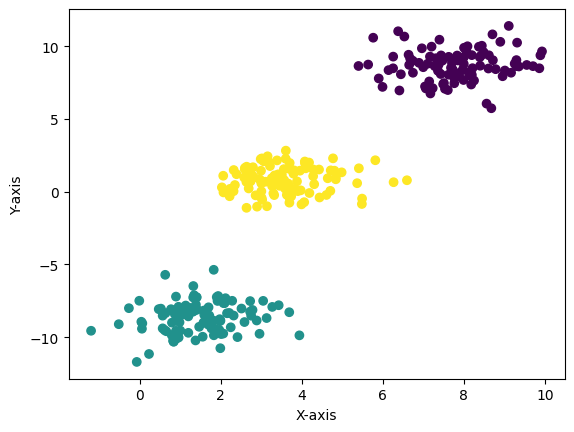

F-measure: 0.3333333333333333
Normalized Mutual Information: 1.0
Rand Index: 1.0


In [5]:
# Define the range of cluster values (k) to test
cluster_range = range(1, 9)

# Generate Dataset 1: Blobs
X1,_ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# Find the best number of clusters (k) for Dataset 1 using the best_number_k function
y_mean_list,sse_list=best_number_k(X1,cluster_range,'Dataset 1: Blobs')

# Determine the number of clusters based on the unique values in y_mean_list[2]
unique_values_count = len(set(y_mean_list[2]))
print("number of k= {}".format(unique_values_count))

# Visualize the clustering result by scatter plotting the dataset with colored clusters
plt.scatter(X1[:, 0], X1[:, 1], c=y_mean_list[2])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Calculate F-measure
f_m1 = f1_score(_, y_mean_list[2],average='macro')
print("F-measure:",f_m1)

# Calculate Normalized Mutual Information (NMI)
nmi_m1 = normalized_mutual_info_score(_,y_mean_list[2])
print("Normalized Mutual Information:",nmi_m1)

# Calculate Rand Index
rand_index_m1 = adjusted_rand_score(_,y_mean_list[2])
print("Rand Index:", rand_index_m1)

**Dataset 2**

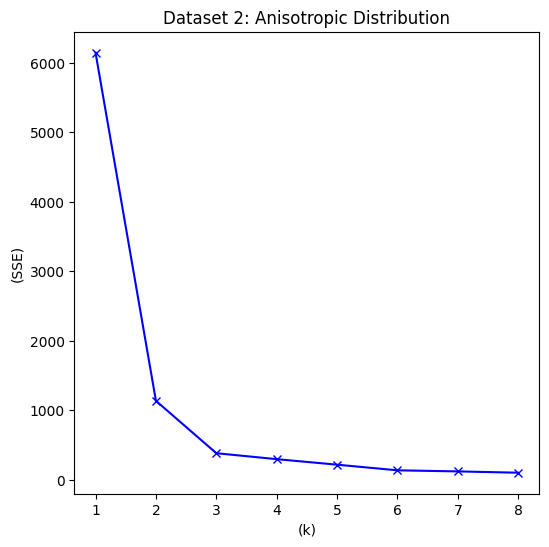

number of k= 3


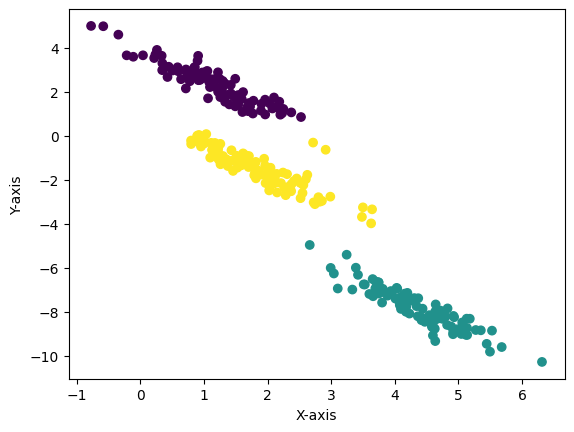

F-measure: 0.33003300330033
Normalized Mutual Information: 0.970191155455844
Rand Index: 0.9800680223095938


In [6]:
# Generate Dataset 2: Anisotropic Distribution
X2, _ = datasets.make_blobs(n_samples=300, random_state=75)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X2 = np.dot(X2, transformation)

# Determine the best number of clusters (k) for Dataset 2 using best_number_k function
y_mean_list,sse_list=best_number_k(X2,cluster_range,'Dataset 2: Anisotropic Distribution')

# Determine the number of clusters based on the unique values in y_mean_list[2]
unique_values_count = len(set(y_mean_list[2]))
print("number of k= {}".format(unique_values_count))

# Visualize the clustering result by scatter plotting the dataset with colored clusters
plt.scatter(X2[:, 0], X2[:, 1], c=y_mean_list[2])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Calculate F-measure
f_m2 = f1_score(_, y_mean_list[2],average='macro')
print("F-measure:", f_m2)

# Calculate Normalized Mutual Information (NMI)
nmi_m2 = normalized_mutual_info_score(_, y_mean_list[2])
print("Normalized Mutual Information:", nmi_m2)

# Calculate Rand Index
rand_index_m2 = adjusted_rand_score(_, y_mean_list[2])
print("Rand Index:", rand_index_m2)

**Dataset 3**

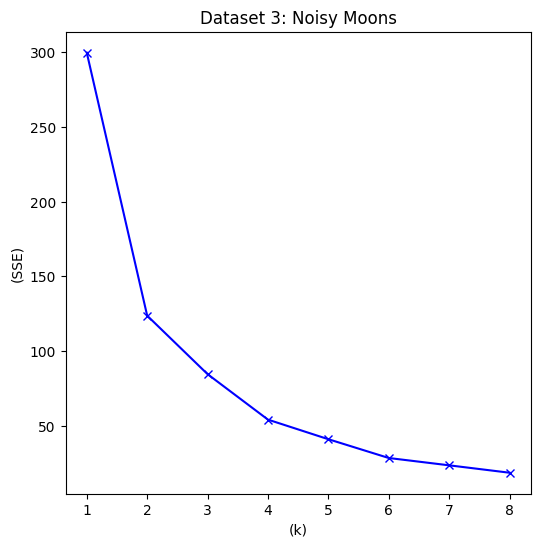

number of k= 4


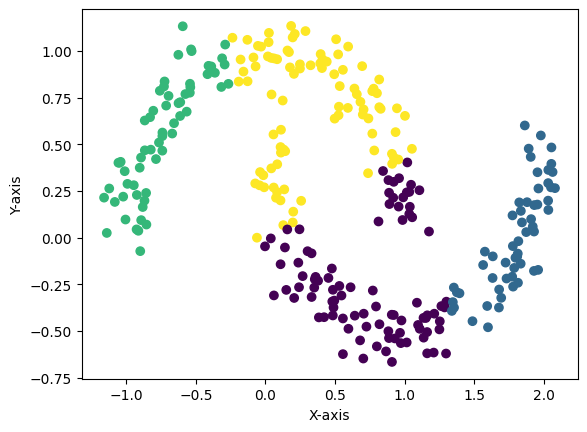

F-measure: 0.17741610603069735
Normalized Mutual Information: 0.35206048709081333
Rand Index: 0.2542275327664506


In [7]:
# Generate Dataset 3: Noisy Moons
X3, _ = datasets.make_moons(n_samples=300, noise=0.1, random_state=75)

# Determine the best number of clusters (k) for Dataset 3 using best_number_k function
y_mean_list,sse_list=best_number_k(X3,cluster_range,'Dataset 3: Noisy Moons')

# Determine the number of clusters based on the unique values in y_mean_list[3]
unique_values_count = len(set(y_mean_list[3]))
print("number of k= {}".format(unique_values_count))

# Visualize the clustering result by scatter plotting the dataset with colored clusters
plt.scatter(X3[:, 0], X3[:, 1], c=y_mean_list[3])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Calculate F-measure
f_m3 = f1_score(_, y_mean_list[3], average='macro')
print("F-measure:", f_m3)

# Calculate Normalized Mutual Information (NMI)
nmi_m3 = normalized_mutual_info_score(_, y_mean_list[3])
print("Normalized Mutual Information:", nmi_m3)

# Calculate Rand Index
rand_index_m3 = adjusted_rand_score(_, y_mean_list[3])
print("Rand Index:", rand_index_m3)

**Dataset 4**

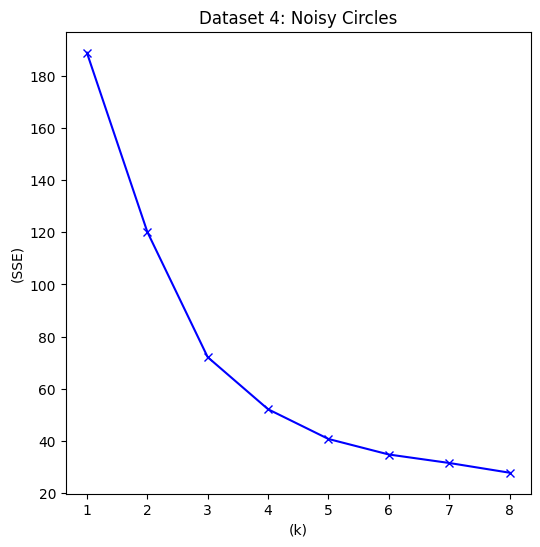

number of k= 4


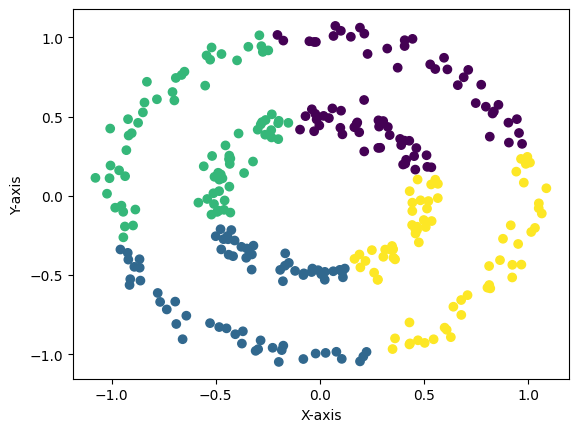

F-measure: 0.16071748878923767
Normalized Mutual Information: 0.00030107388197008573
Rand Index: -0.0047282863719134115


In [8]:
# Generate Dataset 4: Noisy Circles
X4, _ = datasets.make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=75)

# Determine the best number of clusters (k) for Dataset 4 using best_number_k function
y_mean_list,sse_list=best_number_k(X4,cluster_range,'Dataset 4: Noisy Circles')

# Determine the number of clusters based on the unique values in y_mean_list[3]
unique_values_count = len(set(y_mean_list[3]))
print("number of k= {}".format(unique_values_count))

# Visualize the clustering result by scatter plotting the dataset with colored clusters
plt.scatter(X4[:, 0], X4[:, 1], c=y_mean_list[3])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Calculate F-measure
f_m4 = f1_score(_, y_mean_list[3], average='macro')
print("F-measure:", f_m4)

# Calculate Normalized Mutual Information (NMI)
nmi_m4 = normalized_mutual_info_score(_, y_mean_list[3])
print("Normalized Mutual Information:", nmi_m4)

# Calculate Rand Index
rand_index_m4 = adjusted_rand_score(_, y_mean_list[3])
print("Rand Index:", rand_index_m4)

**GMM**

Gaussian Mixture Model (GMM) is a probabilistic model used for clustering and density estimation. Unlike the K-means algorithm, which assumes that data points belong to a single cluster with a specific centroid, GMM allows each data point to have a probability distribution over multiple clusters. It represents the data as a mixture of Gaussian distributions, where each component represents a cluster.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class GMM:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        # Initialize GMM parameters
        self.n_clusters = n_clusters  # Number of clusters
        self.max_iter = max_iter  # Maximum number of iterations
        self.tol = tol  # Tolerance for convergence

    def initialize_parameters(self, X):
        # Initialize cluster parameters: weights, means, and covariances
        self.n_samples, self.n_features = X.shape

        # Initialize cluster weights uniformly
        self.weights = np.ones(self.n_clusters) / self.n_clusters

        # Randomly select samples as initial cluster means
        self.means = X[np.random.choice(np.arange(self.n_samples), size=self.n_clusters, replace=False)]

        # Initialize cluster covariances using sample data
        self.covariances = np.array([np.cov(X.T) for _ in range(self.n_clusters)])

    def e_step(self, X):
        # Expectation step: Compute responsibilities for each sample
        self.responsibilities = np.zeros((self.n_samples, self.n_clusters))
        for k in range(self.n_clusters):
            # Compute responsibilities based on probabilities
            self.responsibilities[:, k] = self.weights[k] * self.compute_probability(X, self.means[k], self.covariances[k])

        # Normalize responsibilities
        self.responsibilities /= np.sum(self.responsibilities, axis=1)[:, np.newaxis]

    def m_step(self, X):
        # Maximization step: Update cluster parameters
        self.weights = np.mean(self.responsibilities, axis=0)

        # Update cluster means
        self.means = np.dot(self.responsibilities.T, X) / np.sum(self.responsibilities, axis=0)[:, np.newaxis]
        self.means = np.nan_to_num(self.means, nan=0.0)  # Replace any NaN values with 0.0

        # Update cluster covariances
        for k in range(self.n_clusters):
            diff = X - self.means[k]
            self.covariances[k] = np.dot(self.responsibilities[:, k] * diff.T, diff) / np.sum(
                self.responsibilities[:, k])

    def compute_probability(self, X, mean, covariance):
        # Compute probability of data point given mean and covariance of a cluster
        exponent = -0.5 * np.sum(np.dot(X - mean, np.linalg.inv(covariance)) * (X - mean), axis=1)
        return (1 / np.sqrt(np.linalg.det(covariance))) * np.exp(exponent)

    def fit(self, X):
        # Fit the Gaussian Mixture Model using EM algorithm

        # Initialize GMM parameters
        self.initialize_parameters(X)

        for iteration in range(self.max_iter):
            old_means = self.means.copy()  # Store previous means for convergence check

            # Perform E-step and M-step
            self.e_step(X)
            self.m_step(X)

            # Check convergence by comparing means
            if np.linalg.norm(self.means - old_means) < self.tol:
                print(f"Converged after {iteration + 1} iterations.")
                break  # Break the loop if converged

        return self.responsibilities  # Return responsibilities after fitting

In [10]:

def plot_clusters(X, y_pred, title):
    # Create a scatter plot of data points colored by cluster assignments
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)

    # Set the title and axis labels
    plt.title(title)  # Set the title of the plot
    plt.xlabel('Feature 1')  # Set the label for the x-axis
    plt.ylabel('Feature 2')  # Set the label for the y-axis

    # Display the plot
    plt.show()

**Dataset 1**

Converged after 82 iterations.


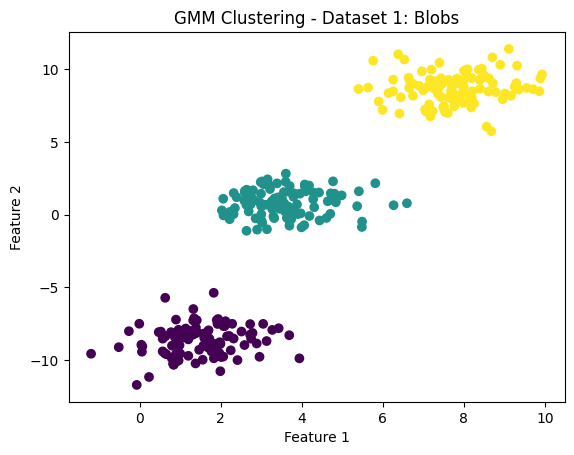

F1-score for Dataset 1: 0.34
Normalized Mutual Information (NMI) for Dataset 1: 1.0
Rand Index for Dataset 1: 1.0


In [11]:
# Apply GMM to Dataset 1: Blobs
gmm = GMM(n_clusters=3)
gmm.fit(X1)
y_pred = np.argmax(gmm.responsibilities, axis=1)

# Plot the clusters
plot_clusters(X1, y_pred, 'GMM Clustering - Dataset 1: Blobs')


# Calculate F1-score for Dataset 1
f1_g1 = f1_score(y4, y_pred,average='micro')
# Print the F1-score for Dataset 1
print("F1-score for Dataset 1:", f1_g1)

# Calculate NMI for Dataset 1
nmi_g1 = normalized_mutual_info_score(y1, y_pred)
# Print the NMI for Dataset 1
print("Normalized Mutual Information (NMI) for Dataset 1:", nmi_g1)


# Calculate Rand Index for Dataset 1
rand_index_g1 = adjusted_rand_score(y1, y_pred)
# Print the Rand Index for Dataset 1
print("Rand Index for Dataset 1:", rand_index_g1)

**Dataset 2**

Converged after 10 iterations.


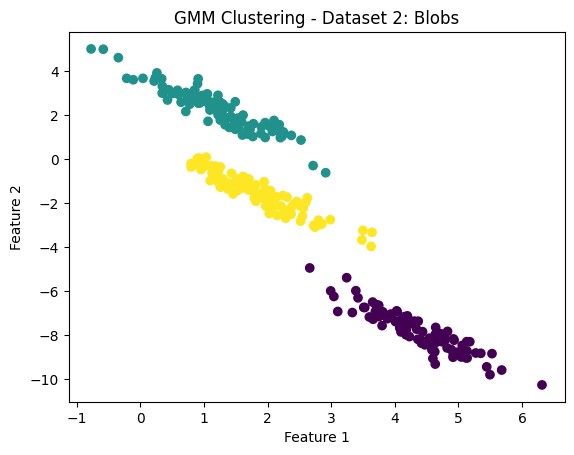

F1-score for Dataset 2: 0.36666666666666664
Normalized Mutual Information (NMI) for Dataset 2: 1.0
Rand Index for Dataset 2: 1.0


In [12]:
# Apply GMM to Dataset 2: Anisotropic Distribution
gmm = GMM(n_clusters=3)
gmm.fit(X2)
y_pred = np.argmax(gmm.responsibilities, axis=1)

# Plot the clusters
plot_clusters(X2, y_pred, 'GMM Clustering - Dataset 2: Blobs')

# Calculate F1-score for Dataset 2
f1_g2 = f1_score(y4, y_pred,average='micro')
# Print the F1-score for Dataset 2
print("F1-score for Dataset 2:", f1_g2)


# Calculate NMI for Dataset 2
nmi_g2 = normalized_mutual_info_score(y2, y_pred)
# Print the NMI for Dataset 2
print("Normalized Mutual Information (NMI) for Dataset 2:", nmi_g2)

# Calculate Rand Index for Dataset 2
rand_index_g2 = adjusted_rand_score(y2, y_pred)
# Print the Rand Index for Dataset 2
print("Rand Index for Dataset 2:", rand_index_g2)



**Dataset 3**

Converged after 88 iterations.


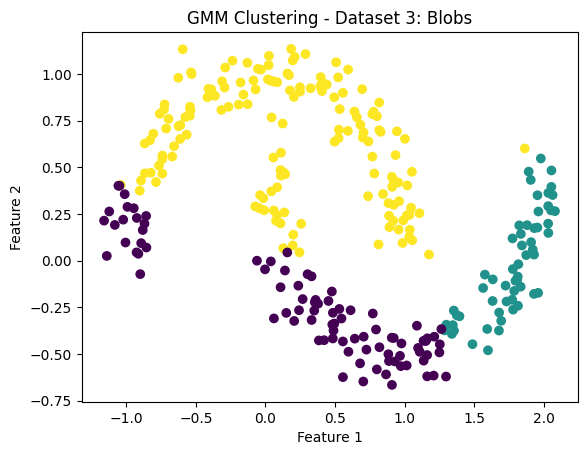

F1-score for Dataset 3: 0.25666666666666665
Normalized Mutual Information (NMI) for Dataset 3: 0.36570797206092504
Rand Index for Dataset 3: 0.37267481230810473


In [13]:
# Apply GMM to Dataset 3: Noisy Moons
gmm = GMM(n_clusters=3)
gmm.fit(X3)
y_pred = np.argmax(gmm.responsibilities, axis=1)

# Plot the clusters
plot_clusters(X3, y_pred, 'GMM Clustering - Dataset 3: Blobs')

# Calculate F1-score for Dataset 3
f1_g3 = f1_score(y4, y_pred,average='micro')
# Print the F1-score for Dataset 3
print("F1-score for Dataset 3:", f1_g3)


# Calculate NMI for Dataset 3
nmi_g3 = normalized_mutual_info_score(y3, y_pred)
# Print the NMI for Dataset 3
print("Normalized Mutual Information (NMI) for Dataset 3:", nmi_g3)


# Calculate Rand Index for Dataset 3
rand_index_g3 = adjusted_rand_score(y3, y_pred)

# Print the Rand Index for Dataset 3
print("Rand Index for Dataset 3:", rand_index_g3)



**Dataset 4**

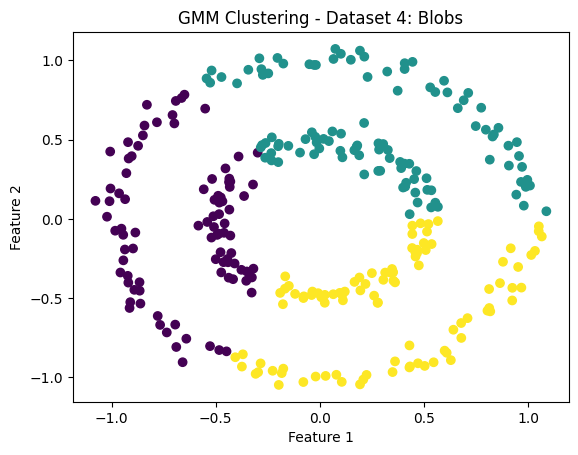

F1-score for Dataset 4: 0.3433333333333333
Normalized Mutual Information (NMI) for Dataset 4: 0.0002680484427232446
Rand Index for Dataset 4: -0.004158232621237864


In [14]:

# Apply GMM to Dataset 4: Noisy Circles
gmm = GMM(n_clusters=3)
gmm.fit(X4)
y_pred = np.argmax(gmm.responsibilities, axis=1)

# Plot the clusters
plot_clusters(X4, y_pred, 'GMM Clustering - Dataset 4: Blobs')

# Calculate F1-score for Dataset 4
f1_g4 = f1_score(y4, y_pred,average='micro')
# Print the F1-score for Dataset 4
print("F1-score for Dataset 4:", f1_g4)

# Calculate NMI for Dataset 4
nmi_g4 = normalized_mutual_info_score(y4, y_pred)
# Print the NMI for Dataset 4
print("Normalized Mutual Information (NMI) for Dataset 4:", nmi_g4)

# Calculate Rand Index for Dataset 4
rand_index_g4 = adjusted_rand_score(y4, y_pred)
# Print the Rand Index for Dataset 4
print("Rand Index for Dataset 4:", rand_index_g4)

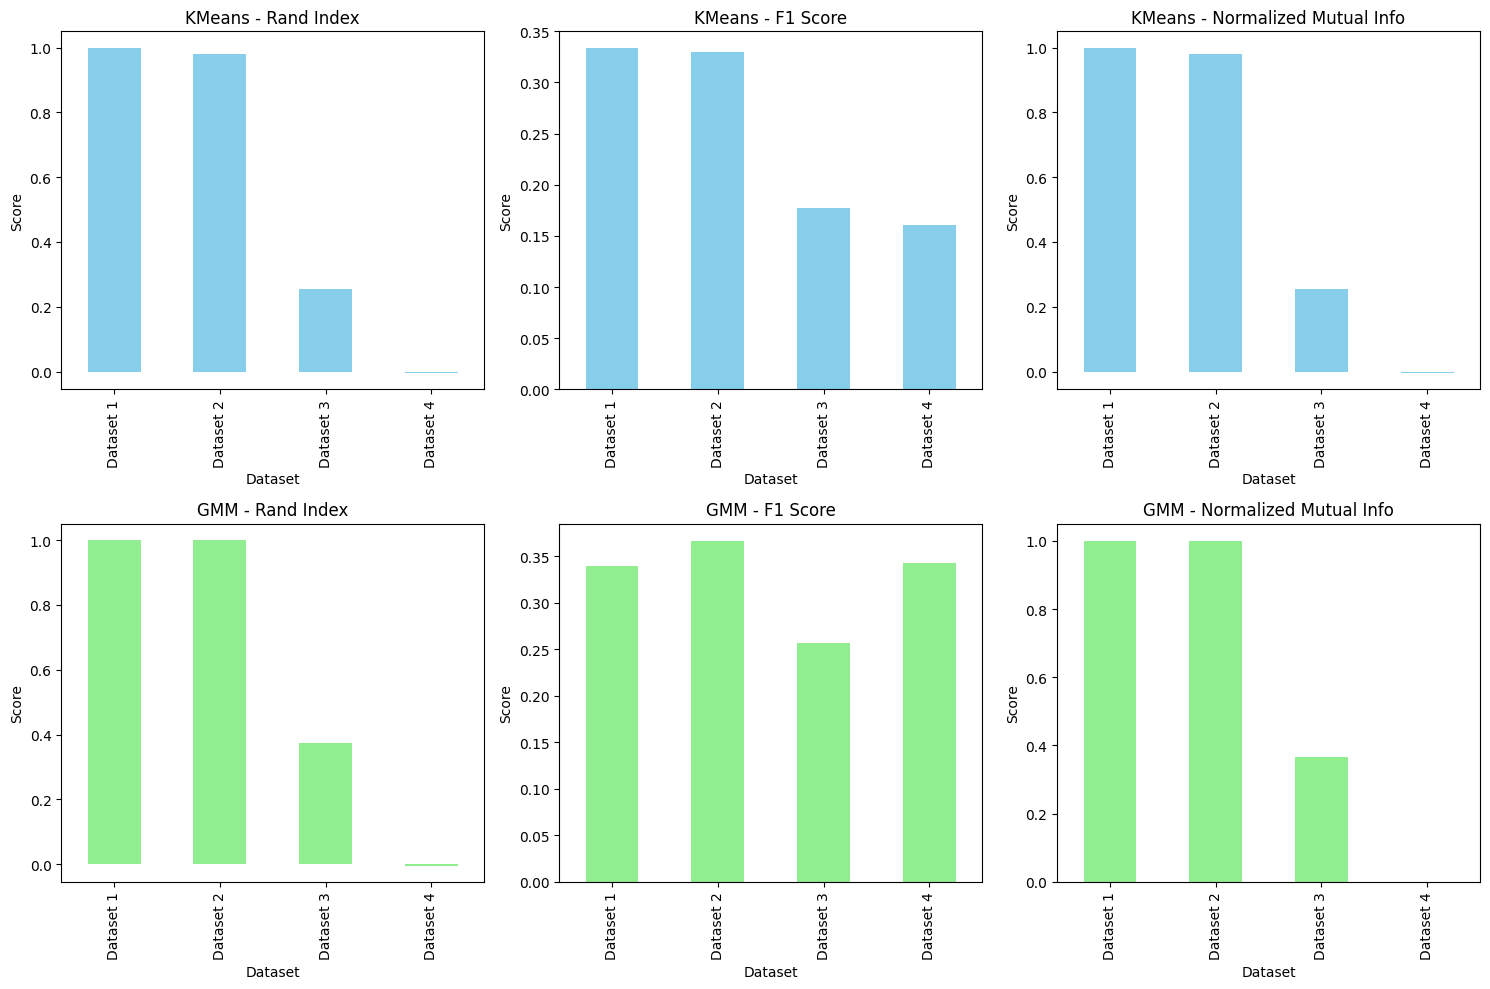

In [15]:
import matplotlib.pyplot as plt

# Sample data
kmeans_results = {
    'Dataset 1': {'Rand Index': rand_index_m1, 'F1 Score': f_m1, 'Normalized Mutual Info': rand_index_m1},
    'Dataset 2': {'Rand Index': rand_index_m2, 'F1 Score': f_m2, 'Normalized Mutual Info': rand_index_m2},
    'Dataset 3': {'Rand Index': rand_index_m3, 'F1 Score': f_m3, 'Normalized Mutual Info': rand_index_m3},
    'Dataset 4': {'Rand Index': rand_index_m4, 'F1 Score': f_m4, 'Normalized Mutual Info': rand_index_m4}
}

gmm_results = {
    'Dataset 1': {'Rand Index': rand_index_g1, 'F1 Score': f1_g1, 'Normalized Mutual Info': nmi_g1},
    'Dataset 2': {'Rand Index': rand_index_g2, 'F1 Score': f1_g2, 'Normalized Mutual Info': nmi_g2},
    'Dataset 3': {'Rand Index': rand_index_g3, 'F1 Score': f1_g3, 'Normalized Mutual Info': nmi_g3},
    'Dataset 4': {'Rand Index': rand_index_g4, 'F1 Score': f1_g4, 'Normalized Mutual Info': nmi_g4}
}

# Convert the results into pandas DataFrames
kmeans_df = pd.DataFrame(kmeans_results).transpose()
gmm_df = pd.DataFrame(gmm_results).transpose()

# Plotting the results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot KMeans results
for i, metric in enumerate(kmeans_df.columns):
    ax = axes[0, i] # Selects the appropriate subplot
    kmeans_df[metric].plot(kind='bar', ax=ax, color='skyblue') # Plots KMeans metric values as a bar plot
    ax.set_title(f'KMeans - {metric}') # Sets the title for the subplot
    ax.set_ylabel('Score') # Sets the y-axis label
    ax.set_xlabel('Dataset') # Sets the x-axis label

# Plot GMM results
for i, metric in enumerate(gmm_df.columns):
    ax = axes[1, i] # Selects the appropriate subplot
    gmm_df[metric].plot(kind='bar', ax=ax, color='lightgreen') # Plots GMM metric values as a bar plot
    ax.set_title(f'GMM - {metric}') # Sets the title for the subplot
    ax.set_ylabel('Score') # Sets the y-axis label
    ax.set_xlabel('Dataset') # Sets the x-axis label

plt.tight_layout() # Adjusts subplot layout to prevent overlap
plt.show() # Displays the plot